## Excercise 6.1
Import the necessary libraries. Define functions to calculate mean, median, skewness, and Pearson's skewness of a sample, and also define a function to sample with different upper bounds.

In [49]:
import thinkstats2
import thinkplot
import hinc
import hinc2
import math
import numpy as np

%matplotlib inline

def createSample(log_upper=6.0):
    df = hinc.ReadData()
    s = hinc2.InterpolateSample(df,log_upper=log_upper)
    s = np.power(10, s)
    return s

def Median(s):
    cdf = thinkstats2.Cdf(s)
    return cdf.Value(0.5)

def RawMoment(s, k):
    return sum(x**k for x in s) / len(s)

def CentralMoment(s, k):
    mean = RawMoment(s,1)
    return sum((x - mean)**k for x in s) / len(s)

def StandardizedMoment(s, k):
    var = CentralMoment(s, 2)
    std = math.sqrt(var)
    return CentralMoment(s, k) / std**k

def Skewness(s):
    return StandardizedMoment(s, 3)

def PearsonSkewness(s):
    median = Median(s)
    mean = RawMoment(s, 1)
    var = CentralMoment(s, 2)
    std = math.sqrt(var)
    return 3 * (mean - median) / std


Calcualte the median, mean, skeweness, Pearson's skewness, and a plot of the PDF of the sample with an upper bound 10^6.

/Users/jadams/ds/metis/metisgh/prework/dsp/ThinkStats2/code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
/Users/jadams/ds/metis/metisgh/prework/dsp/ThinkStats2/code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper


Mean of the sample 74278.7075311872
Std Dev of the sample 93946.92996347832
Median of the sample 51226.45447894046
Sample skewness of the sample 4.949920244429583
Pearson's skewness of the sample 0.7361258019141782
Percentage of households below the mean 0.660005879566872


No handles with labels found to put in legend.


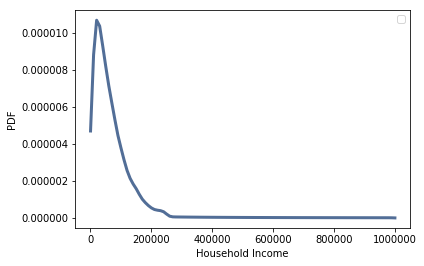

<Figure size 576x432 with 0 Axes>

In [55]:
s = createSample(6.0)

print('Mean of the sample', s.mean())
print('Std Dev of the sample', math.sqrt(CentralMoment(s,2)))
print('Median of the sample', Median(s))
print('Sample skewness of the sample', Skewness(s))
print('Pearson\'s skewness of the sample',PearsonSkewness(s))
print('Percentage of households below the mean', len(s[s <= s.mean()]) / len(s))

sample_pdf = thinkstats2.EstimatedPdf(s)
thinkplot.Pdf(sample_pdf)
thinkplot.Show(xlabel = 'Household Income', ylabel = 'PDF')


Let's see the effect of increasing the upper bound to 10^7.

/Users/jadams/ds/metis/metisgh/prework/dsp/ThinkStats2/code/hinc2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_lower[0] = 3.0
/Users/jadams/ds/metis/metisgh/prework/dsp/ThinkStats2/code/hinc2.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.log_upper[41] = log_upper


Mean of the sample 124267.39722164697
Std Dev of the sample 559608.5013743473
Median of the sample 51226.45447894046
Sample skewness of the sample 11.603690267537793
Pearson's skewness of the sample 0.39156450927742087
Percentage of households below the mean 0.8565630665207663


No handles with labels found to put in legend.


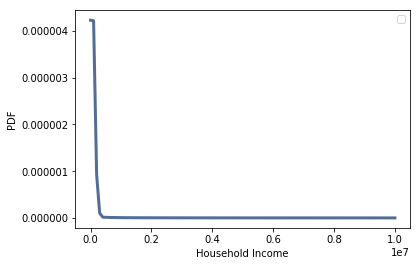

<Figure size 576x432 with 0 Axes>

In [56]:
s = createSample(7.0)

print('Mean of the sample', s.mean())
print('Std Dev of the sample', math.sqrt(CentralMoment(s,2)))
print('Median of the sample', Median(s))
print('Sample skewness of the sample', Skewness(s))
print('Pearson\'s skewness of the sample',PearsonSkewness(s))
print('Percentage of households below the mean', len(s[s <= s.mean()]) / len(s))

sample_pdf = thinkstats2.EstimatedPdf(s)
thinkplot.Pdf(sample_pdf)
thinkplot.Show(xlabel = 'Household Income', ylabel = 'PDF')

Initally, both measure of skewness, sample and Pearson's, indicate an underlying distribution that is skewed to the left of the mean. However, as the upper bound is increased, then Pearson's skewness actually decreases even though you can see from the PDF plot that the distribution has a long left-tail. The sample mean increases, but the sample standard deviation greatly increases which results in a large denominator for Pearson's skewness, and thus a small value. The sample skewness appears to be a better measurment for this sample compared to Pearson's skewness.